In [1]:
from matplotlib import font_manager,rc

font_path= '/Windows/Fonts/H2GTRE.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [8]:
import requests
import bs4

url = 'https://news.daum.net/'
res = requests.get(url)

#print(res.text)

soup = bs4.BeautifulSoup(res.text)
#print(soup)
#data = soup.select('a')
data = soup.find_all('a')
print(data)

[<a href="#mainContent">본문 바로가기</a>, <a href="#gnbContent">메뉴 바로가기</a>, <a class="link_daum" data-tiara-layer="gnb default logo" href="https://www.daum.net/">
<img alt="Daum" class="logo_daum" height="18" src="//t1.daumcdn.net/media/common/newsview_2021/pc/rtn/logo_daum.png" width="44"/>
</a>, <a data-tiara-layer="GNB service news" href="https://news.daum.net/" id="kakaoServiceLogo">
<span class="ir_wa">뉴스</span>
</a>, <a class="link_services" data-tiara-layer="enter" href="https://entertain.daum.net">연예</a>, <a class="link_services" data-tiara-layer="sports" href="https://sports.daum.net">스포츠</a>, <a class="link_gnb" data-tiara-layer="home" href="/"><span class="txt_gnb">홈</span></a>, <a class="link_gnb" data-tiara-layer="society" href="/society"><span class="txt_gnb">사회</span></a>, <a class="link_gnb" data-tiara-layer="politics" href="/politics"><span class="txt_gnb">정치</span></a>, <a class="link_gnb" data-tiara-layer="economic" href="/economic"><span class="txt_gnb">경제</span></a>, <

In [31]:
category_url = {
    '메인' : ['https://news.daum.net/'],
    '사회' : ['https://news.daum.net/society'],
    '정치' : ['https://news.daum.net/politics'],
    '경제' : ['https://news.daum.net/economic'],
    '국제' : ['https://news.daum.net/foreign'],
    '문화' : ['https://news.daum.net/culture'],
    'IT' : ['https://news.daum.net/digital']
}

In [34]:
for i, j in category_url.items() :
    res = requests.get(j[0])
    j.append(res.text)


In [35]:
print(category_url)

{'메인': ['https://news.daum.net/', '\n<!DOCTYPE html>\n\n\n\n<html lang="ko" class="os_unknown none unknown version_0 ">\n<head>\n<meta charset="utf-8">\n<meta name="referrer" content="always" />\n\n<meta property="og:author" content="Daum 뉴스" />\n<meta property="og:site_name" content="다음뉴스" />\n<meta property="og:title" content="홈"/>\n<meta property="og:image" content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" />\n<meta property="og:description" content="다음뉴스" />\n<meta property="og:url" content="https://news.daum.net/" />\n<link rel="shortcut icon" href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico">\n\n<title>홈 | 다음뉴스</title>\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/5c015e8/style.css.merged.css" />\n<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/5c015e8/calendar.css.merged.css" />\n\n<!--[if lte IE 8]>\n<script src="https:/

In [36]:
temp = []
for i, j in category_url.items() :
    soup = bs4.BeautifulSoup(j[1])
    
    for n in soup.find_all('span', attrs={'class' : 'info_cp'}) :
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class' : 'info_thum'}) :
        if n.find('a') == None :
            if '\n' in n.text.strip() :
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '' :
                temp.append(n.find('img', alt=True)['alt'])
            else :
                temp.append(n.text.strip())

In [37]:
print(temp)

['YTN', 'YTN', '연합뉴스', '채널A', '뉴스1', '뉴스1', '한국경제', '문화일보', '문화일보', '한국경제', '문화일보', '아시아경제', '동아일보', '미디어오늘', '오마이뉴스', '파이낸셜뉴스', '뉴시스', '문화일보', '뉴시스', '한국경제', '이데일리', '이데일리', '뉴스1', '뉴스1', '한국일보', '연합뉴스', '중앙일보', '머니투데이', '머니투데이', 'MBC', '머니투데이', '뉴스1', '뉴시스', '뉴시스', '연합뉴스', '연합뉴스', 'JTBC', '연합뉴스', '연합뉴스', '연합뉴스', '헤럴드경제', '오마이뉴스', '여성동아', '뉴시스', 'MBN', '서울신문', '뉴시스', '뉴시스', '헬스조선', '강원도민일보', '뉴시스', '뉴스1', '머니투데이', '비즈니스워치', '조선비즈', '뉴스1', '지디넷코리아', '머니투데이', '아이뉴스24', '지디넷코리아']


In [38]:
soup = bs4.BeautifulSoup(category_url['IT'][1])
for i in soup.find_all('span', attrs={'class' : 'info_thumb'}) :
    if i.find('a') == None :
        print(i.text.strip())

연합뉴스
파이낸셜뉴스
데일리안
뉴스1
헤럴드경제
한겨레
아이뉴스24
한국경제
조선비즈
조선일보
전자신문
한국경제
이데일리
아이뉴스24
전자신문


In [39]:
temp_a = []
soup = bs4.BeautifulSoup(category_url['IT'][1])
for i in soup.find_all('span', attrs={'class' : 'info_thumb'}) :
    if i.find('a') == None :
        print(i.text.strip())
        temp_a.append(n.text.strip())

연합뉴스
파이낸셜뉴스
데일리안
뉴스1
헤럴드경제
한겨레
아이뉴스24
한국경제
조선비즈
조선일보
전자신문
한국경제
이데일리
아이뉴스24
전자신문


In [40]:


temp = []
for i, j in category_url.items() :
    soup = bs4.BeautifulSoup(j[1])
    temp = []
    
    for n in soup.find_all('span', attrs={'class' : 'info_cp'}) :
        temp.append(n.text.strip())
        
    for n in soup.find_all('span', attrs={'class' : 'info_thum'}) :
        if n.find('a') == None :
            if '\n' in n.text.strip() :
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '' :
                temp.append(n.find('img', alt=True)['alt'])
            else :
                temp.append(n.text.strip())
                
    j.append(temp)

In [41]:
print(temp)

['뉴시스', '뉴스1', '머니투데이', '비즈니스워치', '조선비즈', '뉴스1', '지디넷코리아', '머니투데이', '아이뉴스24', '지디넷코리아']


In [42]:
print(category_url['IT'][2])

['뉴시스', '뉴스1', '머니투데이', '비즈니스워치', '조선비즈', '뉴스1', '지디넷코리아', '머니투데이', '아이뉴스24', '지디넷코리아']


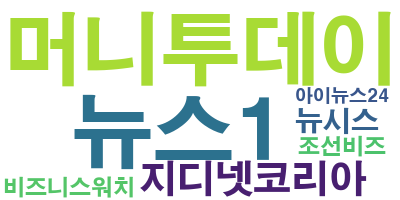

In [46]:
import wordcloud

text = ' '.join(category_url['IT'][2])
wc = wordcloud.WordCloud(font_path=font_path, background_color='white')
wc.generate_from_text(text)
wc.to_image()

In [ ]:
import requests
import bs4

url = 'https://news.daum.net/'
res = requests.get(url)

In [48]:
data = []
for i, j in category_url.items() :
    if i != '메인' :
        data.extend(j[2])
    
unique_data = list(set(data))

print(unique_data)

['뉴스1', 'MBC', '오마이뉴스', '이데일리', '뉴시스', '조선비즈', '동아일보', '여성동아', '연합뉴스', 'MBN', '아이뉴스24', '서울신문', '채널A', '비즈니스워치', 'JTBC', '문화일보', '헬스조선', '지디넷코리아', 'YTN', '헤럴드경제', '아시아경제', '중앙일보', '미디어오늘', '강원도민일보', '머니투데이', '한국경제', '파이낸셜뉴스', '한국일보']


In [50]:
rank = {}
for i in unique_data :
    rank[i] = 0

for i in category_url['IT'][2] :
    rank[i] += 1
    
print(rank)

{'뉴스1': 2, 'MBC': 0, '오마이뉴스': 0, '이데일리': 0, '뉴시스': 1, '조선비즈': 1, '동아일보': 0, '여성동아': 0, '연합뉴스': 0, 'MBN': 0, '아이뉴스24': 1, '서울신문': 0, '채널A': 0, '비즈니스워치': 1, 'JTBC': 0, '문화일보': 0, '헬스조선': 0, '지디넷코리아': 2, 'YTN': 0, '헤럴드경제': 0, '아시아경제': 0, '중앙일보': 0, '미디어오늘': 0, '강원도민일보': 0, '머니투데이': 2, '한국경제': 0, '파이낸셜뉴스': 0, '한국일보': 0}


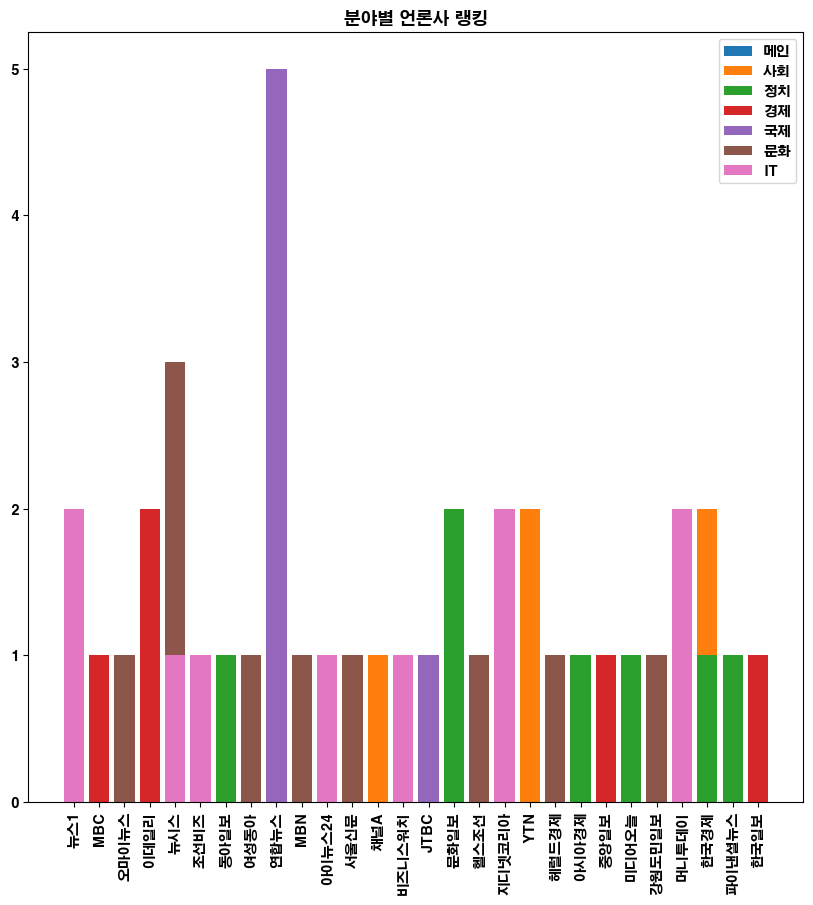

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in category_url.keys() :
    rank = {}
    
    for j in unique_data :
        rank[j] = 0
    
    for j in category_url[i][2] :
        rank[j] += 1
        
    x = rank.keys()
    y = rank.values()
    plt.bar(x,y,label=i)
    
plt.xticks(rotation=90)
    
plt.legend()
plt.title('분야별 언론사 랭킹')
plt.show()

In [57]:
rank = {}
for i in data :
    if rank.get(i) == None :
        rank[i] = 1
    else:
        rank[i]+=1    
        
print(rank)

{'YTN': 2, '연합뉴스': 7, '채널A': 1, '뉴스1': 7, '한국경제': 3, '문화일보': 4, '아시아경제': 1, '동아일보': 1, '미디어오늘': 1, '오마이뉴스': 2, '파이낸셜뉴스': 1, '뉴시스': 8, '이데일리': 2, '한국일보': 1, '중앙일보': 1, '머니투데이': 5, 'MBC': 1, 'JTBC': 1, '헤럴드경제': 1, '여성동아': 1, 'MBN': 1, '서울신문': 1, '헬스조선': 1, '강원도민일보': 1, '비즈니스워치': 1, '조선비즈': 1, '지디넷코리아': 2, '아이뉴스24': 1}


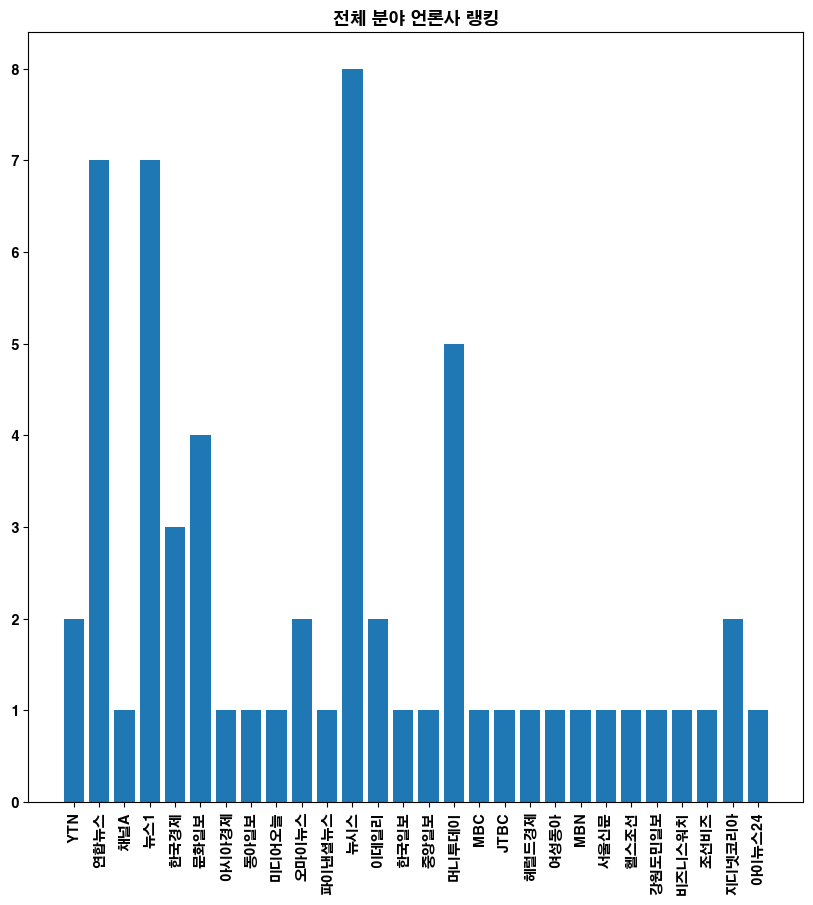

In [58]:
plt.figure(figsize=(10,10))
x = rank.keys()
y = rank.values()
plt.bar(x,y)
plt.xticks(rotation=90)
plt.title('전체 분야 언론사 랭킹')
plt.show()

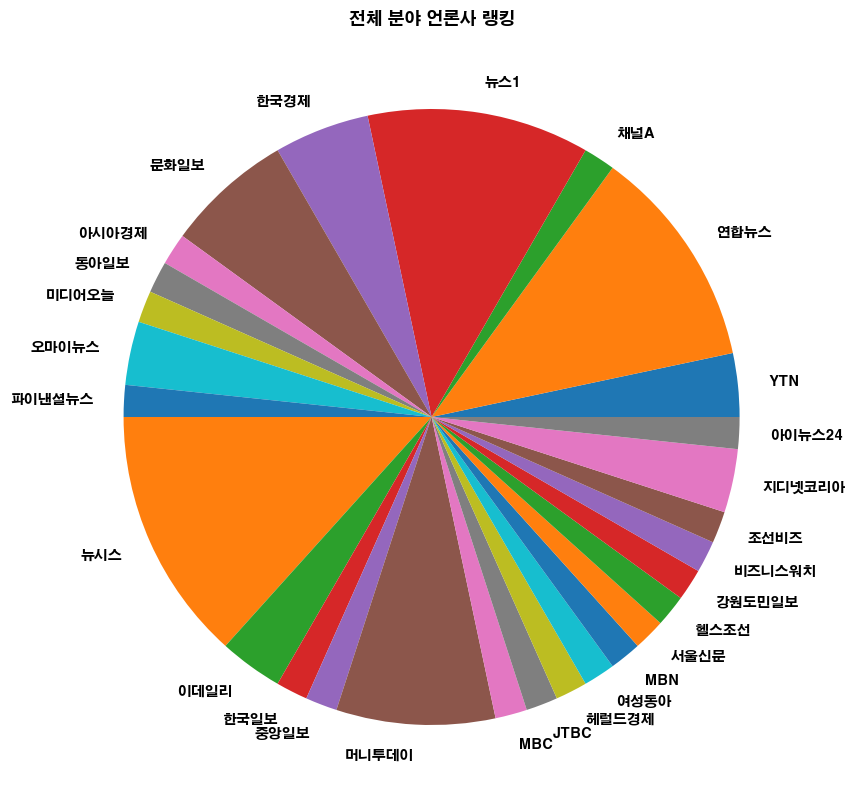

In [60]:
plt.figure(figsize=(10,10))
x = rank.keys()
y = rank.values()
plt.pie(y, labels=x)
plt.title('전체 분야 언론사 랭킹')
plt.show()